->Loading the dataset
First, load the diabetes.csv file which is the diabetes collection dataset into a Pandas dataframe. 

In [172]:
import pandas as pd

df = pd.read_csv('D:/UTM/SEM 2/AI/Assignment/ASSIGNMENT 2/diabetes.csv')


Now we load and quick visual inspect the data

In [173]:
print("\nFirst 10 Rows:")
print("Dataset Shape:", df.shape)
df.head(10)


First 10 Rows:
Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Seems like it consist of 768 data and have 9 features.

Now check missing value of the diabetes datasets

In [174]:
df.info()
print("\nCheck Missing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Check Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age    

Ok, no missing value at all

Check any duplicate in the dataset

In [175]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

No duplicate value

# Data Cleaning & Preparation
 Identifying Invalid Zeros, <br>
 *pregnancy can have zero (some ppl dont give birth) <br>
 *Glucose, not possible to zero (if zero means die?) <br>
 *SkinThickness refer to skin fold thickness, a type of body measure, high value means very fat. So not possible zero <br>
 *Insulin, hormone value in human body, not possible zero <br>
 *BMI, Body Mass Index, not possible zero  <br>
 *DiabetesPedigreeFunction, a score of likelihood of diabetes based on family, highvalue means the individual easily get diabetes <br>
 *Age <br>


In [176]:
import numpy as np
not_zero_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
df[not_zero_column] = df[not_zero_column].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [177]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Now we done replace the zero value into null value/missing (nan). <br>
Next is imputing the missing value. But before imputing, we need to choose which imputing strategy. <br>
check the propotion of missing value

In [178]:
# proportion of missing values
missing_value_of_insulin = df['Insulin'].isnull().sum()
print("\nProportion of Missing Values in Insulin Column:")
print(round(missing_value_of_insulin / len(df),4))



Proportion of Missing Values in Insulin Column:
0.487


Since missing propotion is 48.7 > 20 percent. Simple impute like mean, mode cnt be used. <br>
Need to used more advance imputation <br>
Because the dataset is inter-dependent relationships between features, so MICE imputation is used  (Multiple Imputation by Chained Equations)<br>
Refer to below link, for choosing the most suitable impute technique <br>
https://medium.com/@tarangds/a-comprehensive-guide-to-data-imputation-techniques-strategies-and-best-practices-152a10fee543


* Imputing Missing Values using MICE

In [192]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
imputer.fit(df[not_zero_column])
df[not_zero_column] = imputer.transform(df[not_zero_column])
df[not_zero_column] = round(df[not_zero_column], 1)
print("\nAfter Imputation:")
print(df.isnull().sum())
df.head(10)



After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Cluster                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148.0,72.0,35.0,218.2,33.6,0.6,50.0,1,1
1,1,85.0,66.0,29.0,68.5,26.6,0.4,31.0,0,0
2,8,183.0,64.0,21.1,271.7,23.3,0.7,32.0,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.2,21.0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.3,33.0,1,1
5,5,116.0,74.0,21.9,126.9,25.6,0.2,30.0,0,0
6,3,78.0,50.0,32.0,88.0,31.0,0.2,26.0,1,0
7,10,115.0,72.1,31.1,141.8,35.3,0.1,29.0,0,1
8,2,197.0,70.0,45.0,543.0,30.5,0.2,53.0,1,1
9,8,125.0,96.0,33.1,160.0,34.8,0.2,54.0,1,1


Now no more 0 values

# EDA analysis

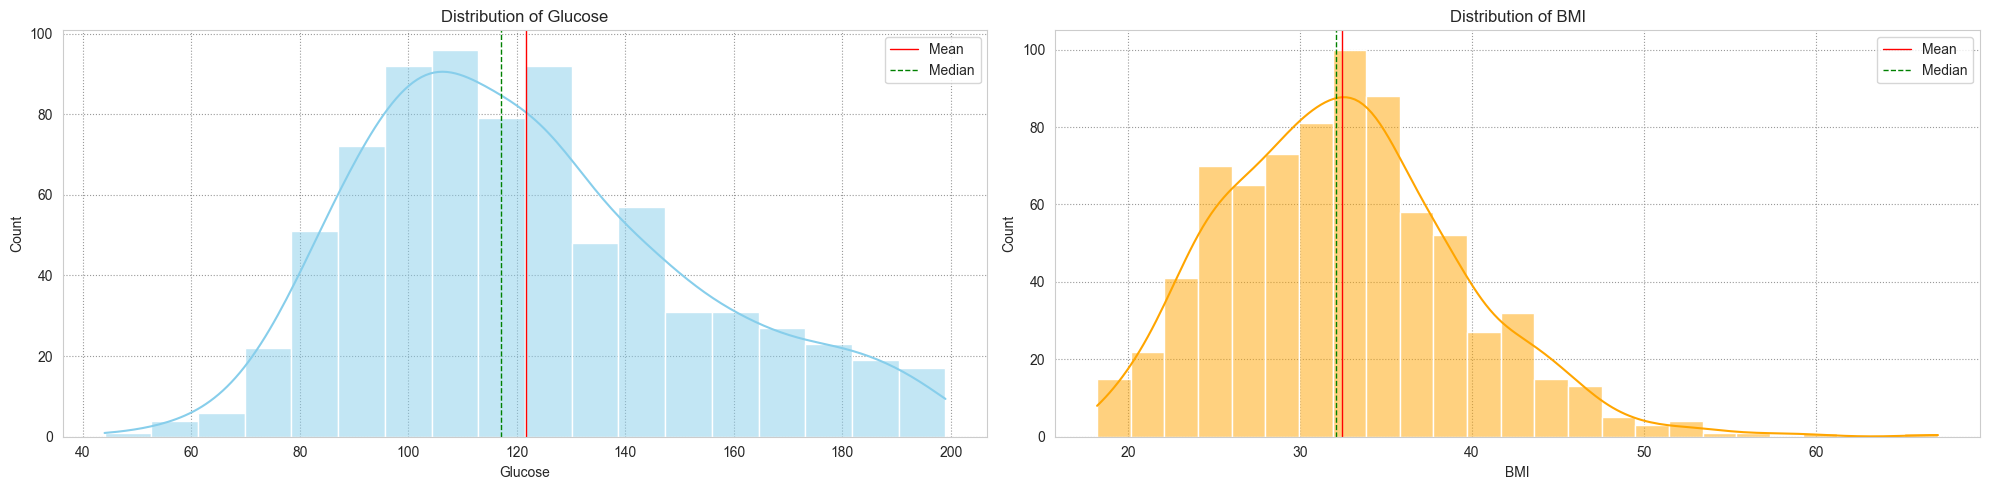

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Glucose plot
sns.histplot(df['Glucose'], kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(df['Glucose'].mean(), color='red', linestyle='-', linewidth=1, label='Mean')
axes[0].axvline(df['Glucose'].median(), color='green', linestyle='--', linewidth=1, label='Median')
axes[0].set_title('Distribution of Glucose')
axes[0].legend()

# BMI plot
sns.histplot(df['BMI'], kde=True, ax=axes[1], color='orange')
axes[1].axvline(df['BMI'].mean(), color='red', linestyle='-', linewidth=1, label='Mean')
axes[1].axvline(df['BMI'].median(), color='green', linestyle='--', linewidth=1, label='Median')
axes[1].set_title('Distribution of BMI')
axes[1].legend()

plt.tight_layout()
plt.show()



The distribution of gluscose is right skewed means some individuals have abnormally high glucose levels. The mode falls near to the normal range of glucose(100–130).

BMI distribution also right skewed, means some portion is overweight. The mode falls between 30-35 means obesity is the most common metabolic state in this dataset.

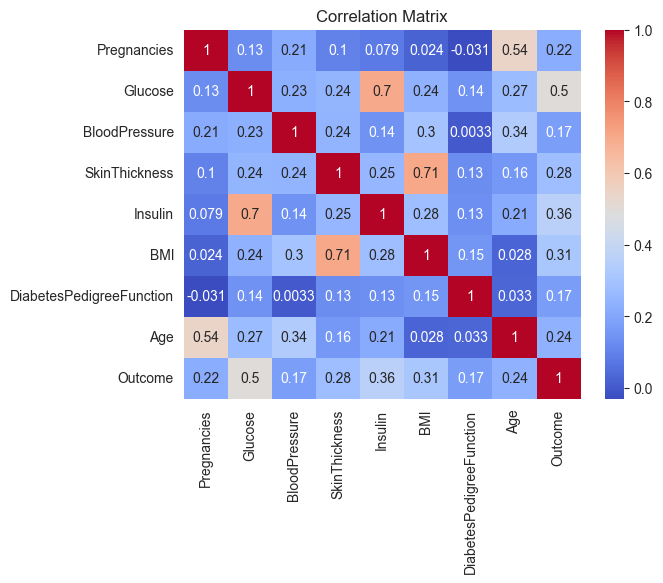

<Figure size 1000x1000 with 0 Axes>

In [181]:
# Correlation Matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.figure(figsize=(10,10))
plt.tight_layout()

The strongest positive correlation with Outcome is observed for Glucose (0.50). Common sense, high blood glucose levels always lead to diabetes   
Insulin is the second strong correlation to the outcome (0.36)   
BMI (Body Mass Index) steps forward next with a correlation of 0.31 with Outcome   
Moderate positive correlations -> Age (0.24), SkinThickness (0.28), pregnancies (0.22)    
Weak positive correlation-> Blood pressure (0.17), DiabetesPedigreeFunction (0.17)

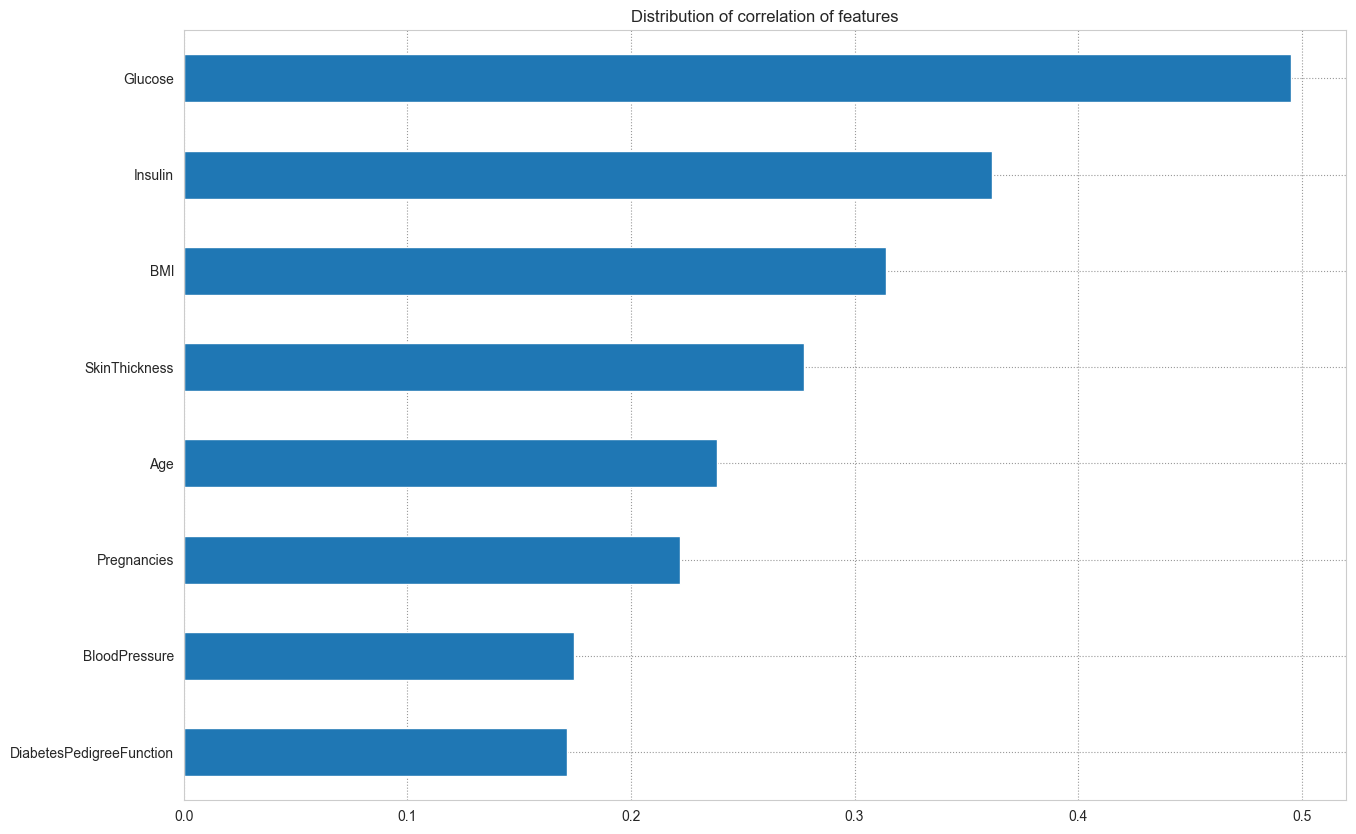

In [193]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.color_palette("magma", as_cmap=True)
plt.figure(figsize = (15, 10))
plt.title('Distribution of correlation of features')
abs(corr_matrix['Outcome']).sort_values()[:-1].plot.barh()
plt.show()

In [183]:
import plotly.express as px

fig = px.scatter(df, x='Insulin', y='Glucose', color='Outcome',
                    title='Insulin vs Glucose by Outcome',
                    labels={'insulin': 'Insulin Level', 'Glucose': 'Glucose Level'},
                    trendline='ols')  
fig.show()

The plot shows two diabetic patient types first is insulin-resistant (high glucose + high insulin) and 2nd insulin-deficient (high glucose + low insulin). Most non-diabetic individuals (blue) show a moderate range of glucose(70-130) and insulin hormone level(30-120).

In [184]:
fig = px.scatter(df, x='BMI', y='Glucose', color='Outcome',
                 title='BMI vs Glucose by Outcome',
                 labels={'BMI': 'Body Mass Index', 'Glucose': 'Glucose Level'},
                 trendline='ols') 
fig.show()

The plot shows diabetic patients (yellow) is mostly in high BMI (>30) and high glucose (>125) ranges. Non-diabetic patients (blue) dominate healthier ranges. 

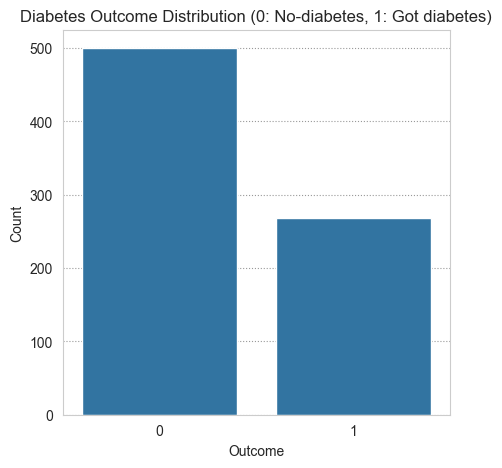


Overall Diabetes counts:
Outcome
0    500
1    268
Name: count, dtype: int64


In [185]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution (0: No-diabetes, 1: Got diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

diabetes_counts = df['Outcome'].value_counts()
print("\nOverall Diabetes counts:")
print(diabetes_counts)

# Unsupervised Learning  
Used k means in tis study


Standardization

In [186]:
from sklearn.preprocessing import StandardScaler

# Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means Clustering

Text(0, 0.5, 'Silhouette Score')

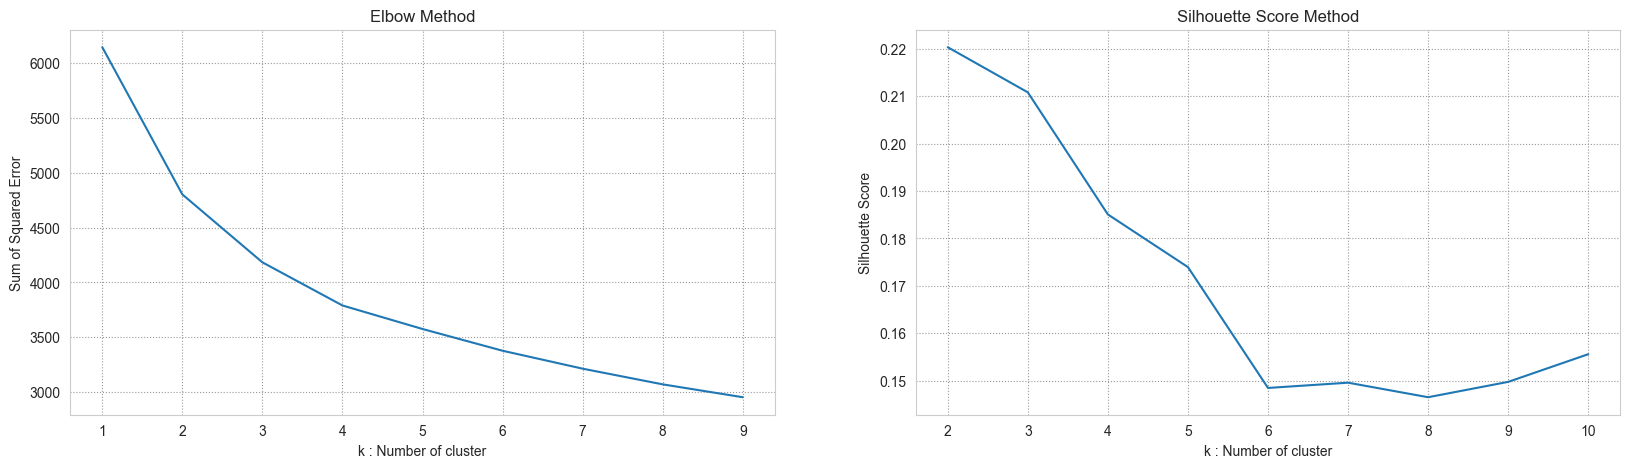

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = {}; # To store sum of squared errors for each k
sil = []; # List to store silhouette scores
kmax = 10 # Maximum number of clusters

fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method :
plt.subplot(1, 2, 1)
for k in range(1, 10): # k starts from 1 to avoid empty clusters
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=42).fit(X_scaled) # max_iteration is set to 300 for convergence
    sse[k] = kmeans.inertia_  # Inertia is sum of distances of samples to their closest cluster center
sns.lineplot(x=list(sse.keys()), y=list(sse.values())) 
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")

# Silhouette Score Method
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1): # k starts from 2 for silhouette score
    kmeans = KMeans(n_clusters=k, max_iter=300,random_state=42).fit(X_scaled) # max_iter is set to 300 for convergence
    labels = kmeans.labels_ # Get cluster labels
    sil.append(silhouette_score(X_scaled, labels, metric='euclidean')) # Calculate silhouette score by comparing each sample to its own cluster and the nearest cluster(euclidean distance)
sns.lineplot(x=range(2, kmax + 1), y=sil) 
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")

The optimal clusters number is k=2. From the elbow method, the SSE continues decreasing after K=2, but at a much slower rate. So Best K appears to be 2 as that's where the "elbow" occurs.  Silhouette score of 0.22 at k=2 indicates the best-defined clusters. Scores decline afterward (0.21, 0.19, etc.), confirming k=2 as the peak. 

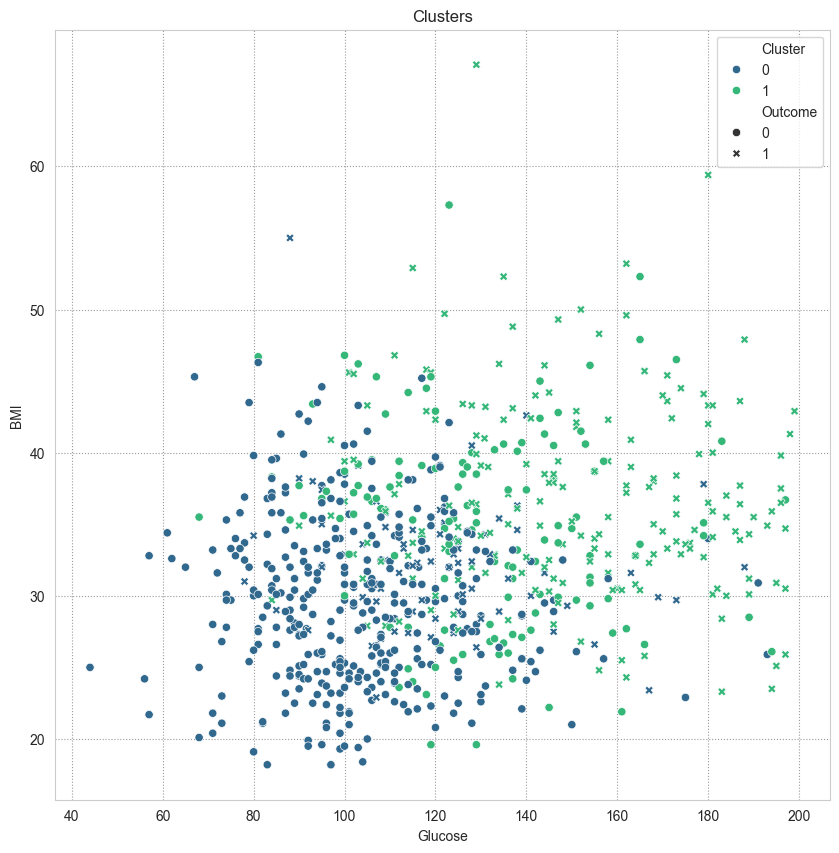

In [188]:
# K-means Clustering
# Fit K-means clustering (**replace 'n_clusters' with the optimal number of clusters**)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
k_mean_clusters = kmeans.fit_predict(X_scaled)

# Visualize the clusters using 'Glucose' and 'BMI'
# Add cluster labels to the dataframe
df['Cluster'] = k_mean_clusters

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Cluster', style='Outcome', palette='viridis')
plt.title('Clusters')
plt.show()



Cluster 0 the dark blue, mostly glucose level is less than 120 and thier BMI value is less than 35. Means cluster 0 is having less diabetes patient with normal glucose lvl and BMI rate.    
Cluster 1 the lime color,mostly their glucose level is exceed 120 and have many 'x' (outcome 1) when glucose lvl> 140 and bmi >30

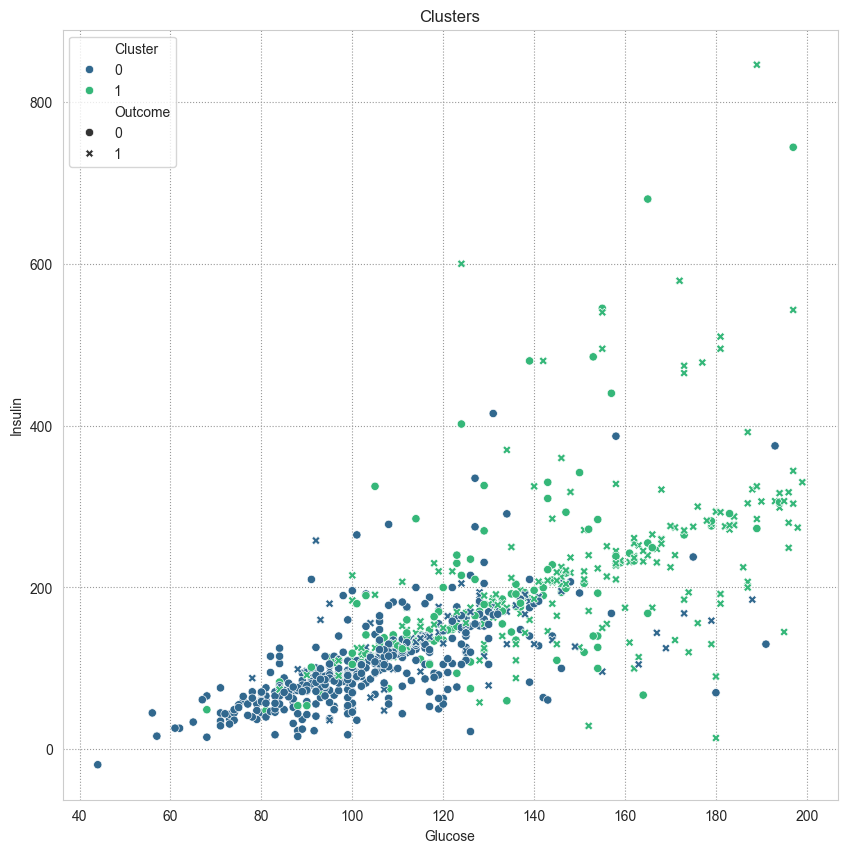

In [189]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Cluster', style='Outcome', palette='viridis')
plt.title('Clusters')
plt.show()


The plot reveals a positive glucose-insulin relationship in non-diabetic individuals (blue), so when glucose level increase the insulin hormone in the body also increase.    
The diabetic people in lime color, is either insulin resistance (high insulin level >180, while glucose level is high>120) or beta-cell dysfunction (low insulin level<180, while glucose level is high)

In [190]:
#Evaluate Clustering
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

cluster_outcomes = df.groupby(['Cluster', 'Outcome']).size().unstack(fill_value=0)
print("\nDiabetic Patient Distribution per Cluster:")
print(cluster_outcomes)


Cluster Distribution:
Cluster
0    437
1    331
Name: count, dtype: int64

Diabetic Patient Distribution per Cluster:
Outcome    0    1
Cluster          
0        363   74
1        137  194


In cluster 0, among 437 ppl, 363 people is non diabetic means cluster 0 mostly have lower bmi and normal glucose lvl.    
In cluster 1,among 331 people 194 has diabetic.

In [191]:
# Cluster Analysis
k_mean_clusters_profile = df.groupby('Cluster').mean()
print("\nCluster Profile:")
print(k_mean_clusters_profile)


Cluster Profile:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Cluster                                                                      
0           2.624714  106.289245       67.53913       24.95881  108.694737   
1           5.456193  141.910574       78.70423       34.11571  210.805136   

               BMI  DiabetesPedigreeFunction        Age   Outcome  
Cluster                                                            
0        29.788101                  0.430435  27.496568  0.169336  
1        35.946526                  0.527492  40.824773  0.586103  


Now further confirm Cluster 0 is more healthier as we see, thier mean bmi is 29.8, glucose lvl is (106.3), age also young (27.5), Insulin level also normal 108.7, and thier skin thickness only 25mm and with a 16.9% of diabetes rate .    

For cluster 1, mostly is diagnose as diabetic patient since their mean bmi is 35.9, glucose lvl is 141.9, more older group (40.8), high insulin level (210.8) [insulin resistance,Type 2 Diabetes], thick skin thickness 34.1mm and with a 58.6% of diabetes rate .
